In [39]:
import math
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import cv2

In [40]:
imgL = cv2.imread("frame0.png", 2)
imgR = cv2.imread("frame1.png", 2)

In [41]:
h, w = imgL.shape

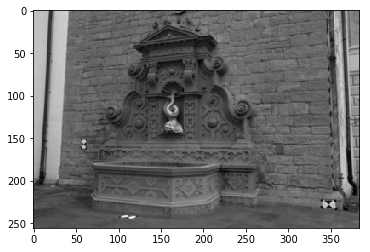

In [42]:
plt.imshow(imgL,"gray")
plt.show()

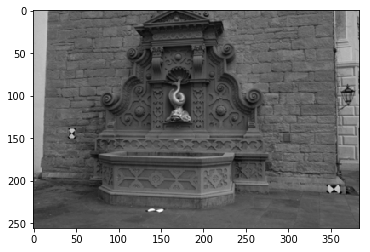

In [43]:
plt.imshow(imgR,"gray")
plt.show()

In [ ]:
def AssembleYMatrix(pixelsImageL, pixelsImageR):
    y_mat = np.zero((len(pixelsImageL), 9))
    for i in len(pixelsImageL):
        xL, yL = pixelsImageL[i]
        xR, yR = pixelsImageR[i]
        y_mat[i,:] = [xR*xL, xR*yL, xR, yR*yL, yR*xL, yR, xL, yL, 1]
    return y_mat

In [69]:
def ncc(template,sample):
    
    if template.shape == sample.shape:
        template = np.array(template, dtype="float")
        sample = np.array(sample, dtype="float")
        
        mean_t = template.mean()
        std_t = template.std()
        mean_s = sample.mean()
        std_s = sample.std()

        n = template.size

        ncc = ((template - mean_t) * (sample - mean_s)).sum() / (std_t * std_s * n)
        return ncc
    else:
        return -1


In [60]:
## test
ncc(imgL, imgR)


0.47903219933792135

In [61]:
## test
imgL.shape == imgR.shape

True

In [70]:
def best_match(xp,yp,imL,imR,psz):
    patchL = imL[xp - psz : xp + psz, yp - psz : yp + psz]
    max_ncc = -1
    up = -1
    for j in range(psz + 1, w - psz):
        patchR = imL[j - psz : j + psz, yp - psz : yp + psz]
        cur_ncc = ncc(patchL, patchR)
        if cur_ncc > max_ncc:
            max_ncc = cur_ncc
            up = j
    return up, yp
        

In [79]:
best_match(100,20, imgL, imgR,10)

(100, 20)

In [77]:
def bi_best_match(xp,yp,ImL,ImR,psz):
    
    c = 2
    up,vp = best_match(xp, yp, ImL, ImR, psz) 
    nxp, nyp = best_match(up, vp, ImR, ImL, psz) 
    
    if abs(xp - nxp) < 2:
        return up, vp
    else: 
        return up, -1
    
    

In [78]:
bi_best_match(100,20, imgL, imgR,10)

(100, 20)